## XGBoost
Xgboost is a supervised machine learning algorithm and is one of decision tree based ensemble learning techinques. Xgboost uses a gradient boosting framework and is an extension to gradient boosted decision trees (GBM) which is specially designed to improve speed and performance. It is a supervised ml algorithm which can be used for both regression and classification problems. It became popular in the recent days and is dominating applied machine learning and Kaggle competitions for structured data because of its scalability.

### Performance of XGBoost over other sklearn classification algorithm
> <img src="https://miro.medium.com/max/1400/1*U72CpSTnJ-XTjCisJqCqLg.jpeg" width="500">

### Features of XGBoost
XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.
> <img src="https://miro.medium.com/max/1400/1*FLshv-wVDfu-i54OqvZdHg.png" width="500">

* Can be run on both single and distributed systems(Hadoop, Spark).
* Can be used in both regression and classification problems.
* Supports parallel processing.
* Cache optimization.
* Efficient memory management for large datasets exceeding RAM.
* Has a variety of regularizations which helps in reducing overfitting.
* Auto tree pruning – Decision tree will not grow further after certain limits internally.
* Can handle missing values.
* Has inbuilt Cross-Validation.
* Takes care of outliers to some extent.

### How XGBoost Regression works
XGBoost works preety much same as the Gradient Boosting, the only difference in xgboost is how it creates its tree. So, lets see how xgboost works step by step.

* **`Step 1:`** Just like Gradient boosting, xgboost create its first intial predictors which is just a `leaf` whose value can be anything but by default it is `0.5`. This means in this stage if we feed any records to the model and ask it to predict its target variable then its answer will be 0.5.

* **`Step 2:`** Next we calculate the prediction error of each records made by our intial predictors, this error is called residuals. Residual for each record is calculated by the subsctracting the prediction value from actual value, which can be written as `Residual = (Actual-predicted)`.

* **`Step 3:`** After calculating model residual we head toward creating decision tree, which uses all availabe features of the dataset to predict residuals of the previous model instead of target variable. So lets see how xgboost create decision tree.
   * **Root Node** → The first step in creating any decision tree is to create its root node, here root node consist all residuals value of the previous model. 
   
   * **Similarity Score** → Then we calculate the `similarity score` of root node. Similarity score is calculated with the following formula, where `λ` (lambda) is a `regularization` parameter. λ scales the similarity score, higher λ means lower similarity score and vise versa
    > 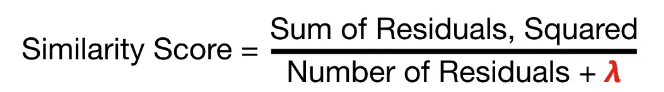
    
   * **Finding best feature to split** → We then try all feature variable to split the root node to find the feature which can predict residual better than any other feature.
   
   * **Tree perfomance Evaluation** → How do we evaluate which is best feature to split the root node? After creating decision tree with all features we calculate the similarity score of root node and both leaf node derived from root node, then we calculate the total `gain score` of each decision tree and choose the one with higest gain score. We calculate the gain score by the following formula
   > 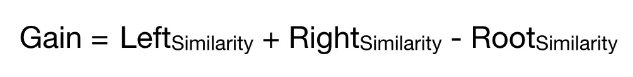
   
   * **Further splitting the tree** → After choosing the tree with higest gain score, we work further on that tree if it need to be, for example if any leaf of that tree can be further splitted. This process looks exactly like above two steps we just did on the root node. We treat the leaf node with multiple values as new node to be splitted, for this we again create multiple splits of with different feautre  that node and choose the one with higest gain score. Similarly we keep splitting the leaf with multiple values until we reach the specified number of `tree-depth`, by deafult it is set to 6
   
    * **Covers** Cover is a term in xgboost used for deciding number of allowed residuals in a single leaf. By default its value is 1 so for example if the cover value of any leaf is less than 1 then that leaf will be deleted. However the default value of Cover can be modified by altering the `min_child_weight` paramter. Cover value of any leaf in Regression is calculated by taking the total number of residual in a leaf so we can have just one residual in a leaf.
    > 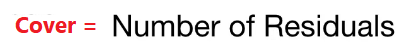
   
   * **Pruning** → Now the tree pruning step takes place, here we remove any branch of the tree whose gain score value is less than the value of `γ`(gamma). 
       * `γ` is a regularization paramter which helps in pruning.
       * Pruning of tree starts from the last branch of the tree
       * It remove any branch of the tree, if its gain score is below the value of `γ`
       * If the gain score of root node itself is below the `γ` then it will remove the whole tree
       * But if any tree branch's gain score is above the `γ` and the gain score of root node of that tree is below `γ` then we will not remove the tree.
       * By default the value of `γ` is 0, but it doesn't means the pruning of tree doesn't happen. Any branch whose gain score is below 0 will be automatically removed. 
       * So the another regularization parameter which we discussed above `λ` lambda also helps in pruning by reducing the value of gain score
       
    * **Output of Leaf node** → Finally we calculate the output of each leaf node of the tree. Calculating the output of leaf node is similar to calculating the similarity score except we don't square the residuals. Below is the formula for calculating output of leaf node
    > 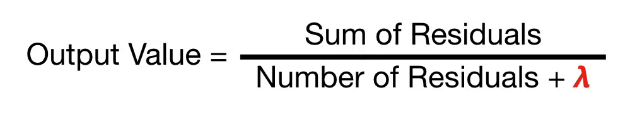
* **`Step 4:`** After creating our decision tree we scale them by learning rate, this learning rate is called eta denoted by `ε`. Now we start making prediction of all records of training dataset by combining the initial predictors with scaled tree.

* **`Step 5:`** Next we repeat step 2, 3 and 4 for the specified number of times or until we optimized the model at max.
---

## Building XGBoost Regression model

In [1]:
# install xgboost 
!pip install xgboost

In [2]:
# importing required librarires
import pandas as pd # for handling dataframe
import numpy as np # for mathematical calculation
from xgboost import XGBRegressor # for building model
import warnings; warnings.filterwarnings('ignore') # <-- for ignoring warnings
from sklearn.model_selection import train_test_split # for splitting dataset 
from sklearn.model_selection import RandomizedSearchCV, cross_val_score  # for finding the best hyperparameter of xgboost

In [3]:
# reading dataset
df = pd.read_csv('cars.csv')
df.head()

,Price,Mileage,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Sedan,6,3.1,4,1,0,1


In [4]:
# categorical data
df.Type.value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

In [5]:
# handling categorical data
df_dummy = pd.get_dummies(df, columns=['Type'])

In [6]:
df_dummy.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.10313,8221,6,3.1,4,1,1,1,0,0,0,1,0
1,17542.03608,9135,6,3.1,4,1,1,0,0,0,0,1,0
2,16218.84786,13196,6,3.1,4,1,1,0,0,0,0,1,0
3,16336.91314,16342,6,3.1,4,1,0,0,0,0,0,1,0
4,16339.17032,19832,6,3.1,4,1,0,1,0,0,0,1,0


In [7]:
# features and label
features = df_dummy.iloc[:, 1:]
label = df_dummy.iloc[:, 1]

print(features.shape, label.shape)

(804, 12) (804,)


In [8]:
# splitting dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=31)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(643, 12) (161, 12) (643,) (161,)


In [9]:
# our model
xgb = XGBRegressor()
# our model parameter
param = {'n_estimators': [x for x in range(10, 200, 20)],
         'max_depth': [x for x in range(1,10)],
         'learning_rate': [x for x in np.arange(0, 1, 0.1)],
         'gamma': [x for x in range(11)],
         'min_child_weight': [0, 1]}

# intializing randomforest, this will try all possible combination of param
model = RandomizedSearchCV(xgb, param_distributions=param, n_iter=5, scoring='roc_auc', cv=5, random_state=66)

In [10]:
# training model
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=5,
                   param_distribut

In [11]:
model.best_params_

{'n_estimators': 70,
 'min_child_weight': 0,
 'max_depth': 1,
 'learning_rate': 0.9,
 'gamma': 4}

In [12]:
# now lets create our final model with best hyper parameter
final_model = XGBRegressor(n_estimators = 70, min_child_weight= 0, max_depth= 1, learning_rate= 0.9, gamma= 4)

# trying 10 fold cross validation
cross_val_score(final_model, x_train, y_train, cv=10)

array([0.99020468, 0.99050576, 0.99313689, 0.9786117 , 0.99316617,
       0.99396577, 0.9951307 , 0.99301292, 0.9938856 , 0.99442418])

So, these are the pretty good score we are getting.

---

### How XGBoost Classification works
XGBoost for classification work almost same as XGBoost regression, the only difference in classification is that how we calculate the similarity score and the output of every leaf nodes. So lets see how it works step by step.

* **`Step 1:`** Just like Gradient boosting, xgboost create its first intial predictors which is just a `leaf` whose value is a probability value and can be anything but by default it is `0.5`. This means in this stage if we feed any records to the model and ask it to predict its target variable then its answer will be 0.5. Also just like Gradient boosting classifier, we need to conver this probability value into log of odds `log(odds)`. Below is the formula for that
> 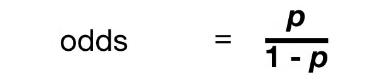
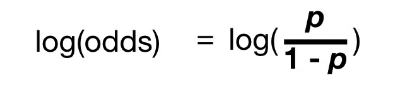

* **`Step 2:`** Next we calculate the prediction error of each records made by our intial predictors, this error is called residuals. Residual for each record is calculated by the subsctracting the prediction value from actual value, which can be written as `Residual = (Actual-predicted)`. Now since this is classification problem lets say binary classification problem, we assume the value of event happenig as 1 and the value of event not happening as 0 in short `Yes=1 & No=0`.

* **`Step 3:`** After calculating model residual we head toward creating decision tree, which uses all availabe features of the dataset to predict residuals of the previous model instead of target variable. So lets see how xgboost create decision tree.
   * **Root Node** → The first step in creating any decision tree is to create its root node, here root node consist all residuals value of the previous model.
   
   * **Similarity Score** → Then we calculate the `similarity score` of root node. Similarity score is calculated with the following formula, where `λ` (lambda) is a `regularization` parameter. λ scales the similarity score, higher λ means lower similarity score and vise versa
    > 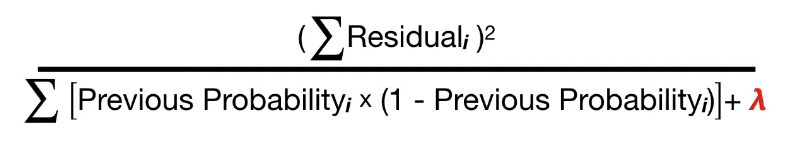
   
   * **Finding best feature to split** → We then try all feature variable to split the root node to find the feature which can predict residual better than any other feature.
   
   * **Tree perfomance Evaluation** → How do we evaluate which is best feature to split the root node? After creating decision tree with all features we calculate the similarity score of root node and both leaf node derived from root node, then we calculate the total `gain score` of each decision tree and choose the one with higest gain score. We calculate the gain score by the following formula
   > 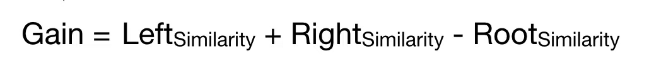
    
    * **Further splitting the tree** → After choosing the tree with higest gain score, we work further on that tree if it need to be, for example if any leaf of that tree can be further splitted. This process looks exactly like above two steps we just did on the root node. We treat the leaf node with multiple values as new node to be splitted, for this we again create multiple splits of that node with different feautre and choose the one with higest gain score. Similarly we keep splitting the leaf with multiple values until we reach the specified number of `tree-depth`, by deafult it is set to 6
    
    * **Covers** Cover is a term in xgboost used for deciding number of allowed residuals in a single leaf. By default its value is 1 so for example if the cover value of any leaf is less than 1 then that leaf will be deleted. However the default value of Cover can be modified by altering the `min_child_weight` paramter. Cover value of any leaf in classification is calculated by taking the sum of (multiple of (previous probability of each element in that leaf) with the 1 - previous probability of each element in that leaf)). Here is the following formula
    > 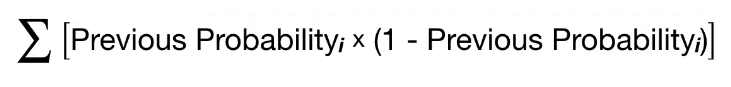
    
     * **Pruning** → Now the tree pruning step takes place, here we remove any branch of the tree whose gain score value is less than the value of `γ`(gamma). 
       * `γ` is a regularization paramter which helps in pruning.
       * Pruning of tree starts from the last branch of the tree
       * It remove any branch of the tree, if its gain score is below the value of `γ`
       * If the gain score of root node itself is below the `γ` then it will remove the whole tree
       * But if any tree branch's gain score is above the `γ` and the gain score of root node of that tree is below `γ` then we will not remove the tree.
       * By default the value of `γ` is 0, but it doesn't means the pruning of tree doesn't happen. Any branch whose gain score is below 0 will be automatically removed. 
       * So the another regularization parameter which we discussed above `λ` lambda also helps in pruning by reducing the value of gain score
       
    * **Output of Leaf node** → Finally we calculate the output of each leaf node of the tree. Calculating the output of leaf node is similar to calculating the similarity score except we don't square the residuals. Below is the formula for calculating output of leaf node
    > 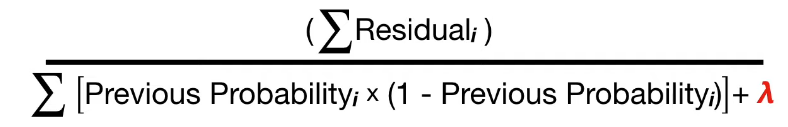

* **`Step 4:`** So now after creating our decision tree we scale them by learning rate, this learning rate is called eta denoted by `ε`. The value of learning rate ranges from 0 to 1 and the default value is 0.3. Now we start making prediction of all records of training dataset by combining the initial predictors with scaled tree.

* **`Step 5:`** After getting the prediction of each records from our combination of intial predictor `leaf` and tree we convert them into proability value, as these are the log of odds `log(odds)` value. So to convert log of odds value to probility value, we use something called logisitic function which is calculated by the following formula:
> 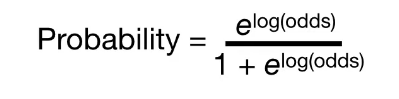

* **`Step 5:`** Next we repeat step 2, 3 and 4 and 5 for the specified number of times or until we optimized the model at max.
---

In [13]:
# importing required librarires
import pandas as pd # for handling dataframe
import numpy as np # for mathematical calculation
from xgboost import XGBClassifier # for building model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # for splitting dataset 
from sklearn.model_selection import RandomizedSearchCV, cross_val_score  # for finding the best hyperparameter of xgboost

In [14]:
# reading dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
# dropping User ID col
df = df.drop('User ID', axis=1)

In [16]:
# categorical data
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [17]:
# handling categorical data with label encoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [18]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [19]:
# features and label
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

print(features.shape, label.shape)

(400, 3) (400,)


In [20]:
# splitting dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=31)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 3) (80, 3) (320,) (80,)


In [21]:
# our model
xgb = XGBClassifier()
# our model parameter
param = {'n_estimators': [x for x in range(10, 200, 20)],
         'max_depth': [x for x in range(1,10)],
         'learning_rate': [x for x in np.arange(0, 1, 0.1)],
         'gamma': [x for x in range(11)],
         'min_child_weight': [0, 1]}

# intializing randomforest, this will try all possible combination of param
model = RandomizedSearchCV(xgb, param_distributions=param, n_iter=5, cv=5, random_state=35)

In [22]:
model.fit(x_train, y_train)

[01:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [23]:
model.best_params_

{'n_estimators': 70,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.5,
 'gamma': 8}

In [24]:
# now lets create our final model with best hyper parameter
final_model = XGBClassifier(n_estimators = 70, min_child_weight= 1, max_depth= 5, learning_rate= 0.5, gamma= 8)

# trying 10 fold cross validation
score = cross_val_score(final_model, features, label, cv=10)

[01:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [25]:
score

array([1.   , 0.65 , 0.9  , 1.   , 1.   , 0.85 , 0.825, 0.775, 0.875,
       0.975])

So, these are the pretty good score we are getting.